#### <center> Implemetation du algorithme de Bellman-Ford </center>

##### importation des bibliotheque

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

##### implementation de l'algorithme de Djikstra

In [19]:
def Djikstra(graphe, depart):
    # Initialiser les distances depuis le noeud de départ vers tous les autres noeuds à l'infini
    distances = {noeud: float('infinity') for noeud in graphe.nodes()}
    # La distance du noeud de départ à lui-même est 0
    distances[depart] = 0

    # Itérer sur tous les noeuds du graphe
    for _ in range(len(graphe.nodes()) - 1):
        # Pour chaque noeud, itérer sur toutes les arêtes connectées à ce noeud
        for arete in graphe.edges(data=True):
            # Déballer les données de l'arête
            noeud1, noeud2, donnees = arete
            # Vérifier si la distance au deuxième noeud de l'arête peut être minimisée en passant par le premier noeud de l'arête
            distances[noeud2] = min(distances[noeud2], distances[noeud1] + donnees['weight'])

    # Retourner les distances depuis le noeud de départ vers tous les autres noeuds
    return distances

##### On crée un graphe pour tester l'algorithme 

In [20]:

g = nx.Graph()

# On ajoute des arêtes au graphe (nœud1, nœud2, poids)
g.add_edge('A', 'B', weight=1)
g.add_edge('B', 'C', weight=2)
g.add_edge('C', 'D', weight=12)
g.add_edge('D', 'A', weight=4)
g.add_edge('A', 'C', weight=5)
g.add_edge('B', 'D', weight=6)


##### On affiche le graphe original

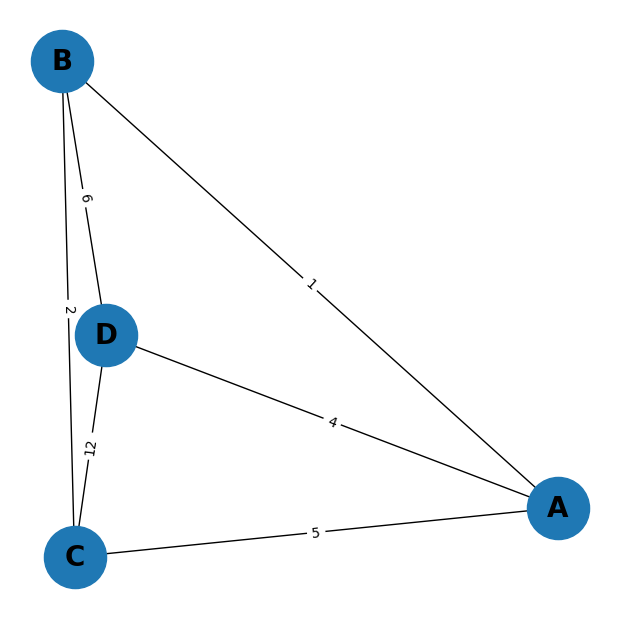

In [21]:
plt.figure(figsize=(6, 6))  # On cree une nouveau figure
pos = nx.spring_layout(g)  # On calcule la position des noued
nx.draw(g, pos, with_labels=True, node_size=2000, font_size=20, font_weight='bold')

# On ajoute les cout des noued a la figure
edge_labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=edge_labels)

plt.show()  # On affiche l'image

#### On applique l'algorithme de Bellman sur le graphe

In [22]:
distances = Djikstra(g, 'A')

# On affiche les distances
for node, distance in distances.items():
    print(f'Distance minimal de A à {node} : {distance}')

Distance minimal de A à A : 0
Distance minimal de A à B : 1
Distance minimal de A à C : 3
Distance minimal de A à D : 4
